In [1]:
from scGeneFit.functions import *

%matplotlib inline
import numpy as np
np.random.seed(0) 

In [2]:
from sklearn.neighbors import NearestCentroid
clf=NearestCentroid()

def performance(X_train, y_train, X_test, y_test, clf):
    clf.fit(X_train, y_train)
    return clf.score(X_test, y_test)

# CITEseq example

In [3]:
#load data from files
[data, labels, names]= load_example_data("CITEseq")
N,d=data.shape

## Use of scGeneFit (center based constraints)

In [4]:
num_markers=25
method='centers'
redundancy=0.25

markers= get_markers(data, labels, num_markers, method=method, redundancy=redundancy)

accuracy=performance(data, labels, data, labels, clf)
accuracy_markers=performance(data[:,markers], labels, data[:,markers], labels, clf)

print("Accuracy (whole data,", d, " markers): ", accuracy)
print("Accuracy (selected", num_markers, "markers)", accuracy_markers)

Solving a linear program with 500 variables and 45 constraints
Time elapsed: 0.0818631649017334 seconds
Accuracy (whole data, 500  markers):  0.8660786816757572
Accuracy (selected 25 markers) 0.7863525588952072


Computing TSNE embedding
Elapsed time: 95.90049290657043 seconds


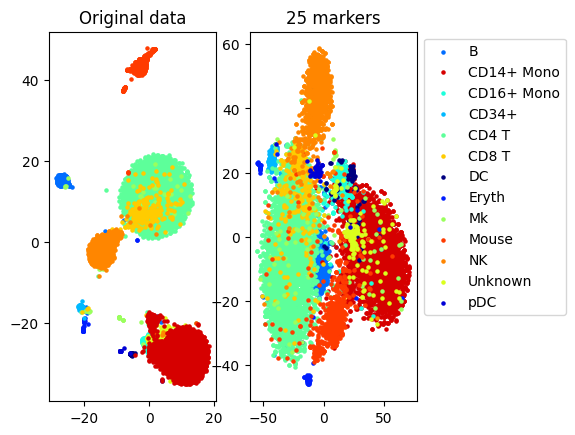

In [5]:
#TSNE plot
a=plot_marker_selection(data, markers, names)

## Use of scGeneFit (pairwise distance constraints)

In [6]:
num_markers=25
method='pairwise'
sampling_rate=0.1 #use 10 percent of the data to generate constraints
n_neighbors=3 #3 constraints per point
epsilon=1 #Delta is 10*norm of the smallest constraint
max_constraints=1000 #use at most 1000 constraints (for efficiency)

markers= get_markers(data, labels, num_markers, method=method, sampling_rate=sampling_rate,
                     n_neighbors=n_neighbors, epsilon=epsilon, max_constraints=max_constraints)

accuracy=performance(data, labels, data, labels, clf)
accuracy_markers=performance(data[:,markers], labels, data[:,markers], labels, clf)

print("Accuracy (whole data,", d, " markers): ", accuracy)
print("Accuracy (selected", num_markers, "markers)", accuracy_markers)

Solving a linear program with 500 variables and 1000 constraints
Time elapsed: 6.008021116256714 seconds
Accuracy (whole data, 500  markers):  0.8660786816757572
Accuracy (selected 25 markers) 0.7672043634675642


Computing TSNE embedding
Elapsed time: 74.63262414932251 seconds


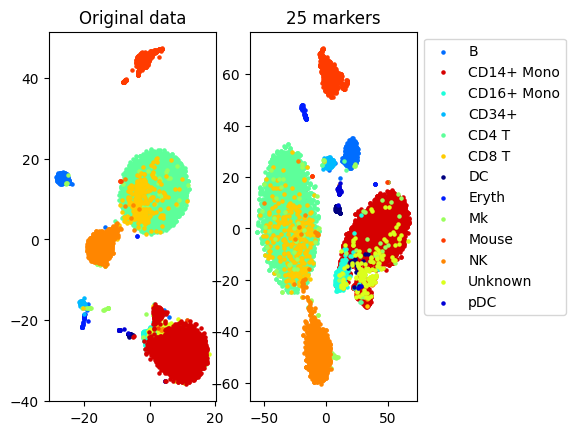

In [7]:
#TSNE plot
a=plot_marker_selection(data, markers, names)

## Use of scGeneFit (pairwise center based constraints)

In [8]:
num_markers=25
method='pairwise_centers'
sampling_rate=0.1 #use 10 percent of the data to generate constraints
n_neighbors=0 #neighbors are not used for the center constraints 
epsilon=10 #Delta is 10*norm of the smallest constraint
max_constraints=1000 #use at most 5000 constraints (for efficiency)

markers= get_markers(data, labels, num_markers, method=method, 
                     sampling_rate=sampling_rate, n_neighbors=n_neighbors, epsilon=epsilon, 
                     max_constraints=max_constraints)

accuracy=performance(data, labels, data, labels, clf)
accuracy_markers=performance(data[:,markers], labels, data[:,markers], labels, clf)

print("Accuracy (whole data,", d, " markers): ", accuracy)
print("Accuracy (selected", num_markers, "markers)", accuracy_markers)

Solving a linear program with 500 variables and 1000 constraints
Time elapsed: 1.222273826599121 seconds
Accuracy (whole data, 500  markers):  0.8660786816757572
Accuracy (selected 25 markers) 0.794708135081815


Computing TSNE embedding
Elapsed time: 76.88243508338928 seconds


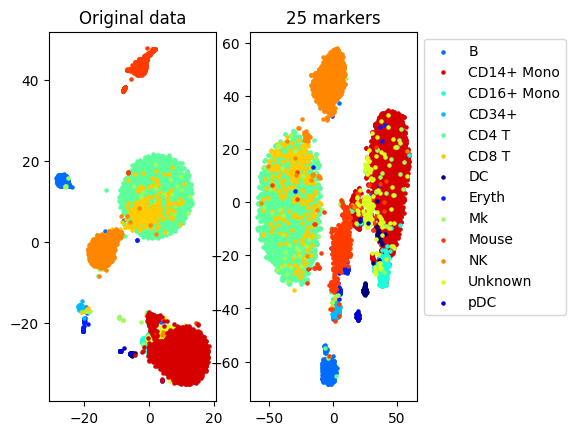

In [9]:
#TSNE plot
a=plot_marker_selection(data, markers, names)

## One vs all markers

In [10]:
markers2=one_vs_all_selection(data,labels)

accuracy=performance(data, labels, data, labels, clf)
accuracy_markers=performance(data[:,markers2], labels, data[:,markers2], labels, clf)

print("Accuracy (whole data,", d, " markers): ", accuracy)
print("Accuracy (selected", num_markers, "markers)", accuracy_markers)

0.6819602818587152 20 0.03409801409293576
[0.         0.03409801 0.06819603 0.10229404 0.13639206 0.17049007
 0.20458808 0.2386861  0.27278411 0.30688213 0.34098014 0.37507816
 0.40917617 0.44327418 0.4773722  0.51147021 0.54556823 0.57966624
 0.61376425 0.64786227 0.68196028]
Accuracy (whole data, 500  markers):  0.8660786816757572
Accuracy (selected 25 markers) 0.7537426018335848


Computing TSNE embedding
Elapsed time: 88.89766192436218 seconds


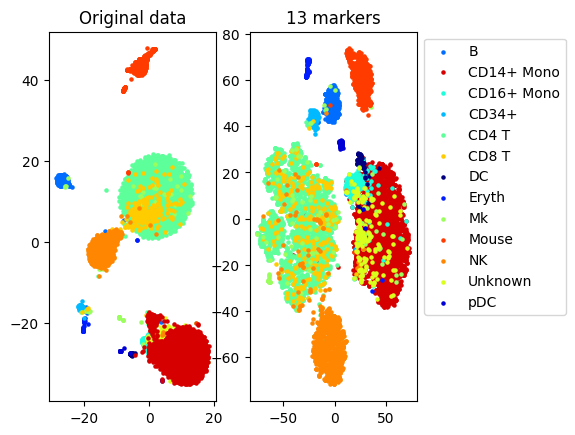

In [11]:
a=plot_marker_selection(data, markers2, names)

# Zeisel example

In [12]:
#load data from file
[data, labels, names]=load_example_data("zeisel")
N,d=data.shape

In [13]:
num_markers=25
method='centers'
redundancy=0.1

markers= get_markers_hierarchy(data, labels, num_markers, method=method, redundancy=redundancy)

accuracy=performance(data, labels[0], data, labels[0], clf)
accuracy_markers=performance(data[:,markers], labels[0], data[:,markers], labels[0], clf)

print("Accuracy (whole data,", d, " markers): ", accuracy)
print("Accuracy (selected", num_markers, "markers)", accuracy_markers)


Solving a linear program with 4000 variables and 103 constraints
Time elapsed: 0.5236461162567139 seconds
Accuracy (whole data, 4000  markers):  0.8745424292845257
Accuracy (selected 25 markers) 0.8988352745424293


Computing TSNE embedding
Elapsed time: 22.167927980422974 seconds


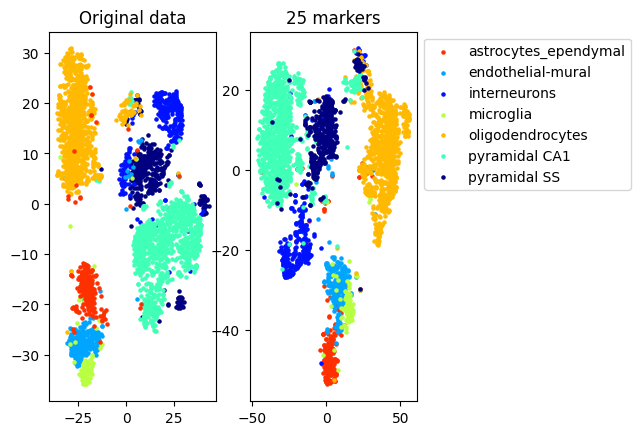

In [14]:
#TSNE plot
a=plot_marker_selection(data, markers, names[0])

## Use of scGeneFit (pairwise distance constraints)

In [15]:
num_markers=25
method='pairwise'
sampling_rate=0.05 #use 5 percent of the data to generate constraints
n_neighbors=3 #3 constraints per point
epsilon=10 #Delta is 10*norm of the smallest constraint
max_constraints=500 #use at most 500 constraints (for efficiency)
use_centers=False #constraints given by pairwise distances

markers= get_markers_hierarchy(data, labels, num_markers, method=method, 
                     sampling_rate=sampling_rate, n_neighbors=n_neighbors, epsilon=epsilon)

accuracy=performance(data, labels[0], data, labels[0], clf)
accuracy_markers=performance(data[:,markers], labels[0], data[:,markers], labels[0], clf)

print("Accuracy (whole data,", d, " markers): ", accuracy)
print("Accuracy (selected", num_markers, "markers)", accuracy_markers)


Solving a linear program with 4000 variables and 1000 constraints
Time elapsed: 5.82737398147583 seconds
Accuracy (whole data, 4000  markers):  0.8745424292845257
Accuracy (selected 25 markers) 0.837936772046589


## Use of scGeneFit (pairwise center based constraints)

In [16]:
num_markers=25
method='pairwise_centers'
sampling_rate=0.05 #use 5 percent of the data to generate constraints
n_neighbors=0 #neighbors are not used for the center constraints
epsilon=10 #Delta is 10*norm of the smallest constraint
max_constraints=500 #use at most 500 constraints (for efficiency)
use_centers=True #constraints given by pairwise distances

markers = get_markers_hierarchy(data, labels, num_markers, method=method, 
                     sampling_rate=sampling_rate, n_neighbors=n_neighbors, epsilon=epsilon)

accuracy=performance(data, labels[0], data, labels[0], clf)
accuracy_markers=performance(data[:,markers], labels[0], data[:,markers], labels[0], clf)

print("Accuracy (whole data,", d, " markers): ", accuracy)
print("Accuracy (selected", num_markers, "markers)", accuracy_markers)

Solving a linear program with 4000 variables and 1000 constraints
Time elapsed: 27.476181983947754 seconds
Accuracy (whole data, 4000  markers):  0.8745424292845257
Accuracy (selected 25 markers) 0.9221297836938436


Computing TSNE embedding
Elapsed time: 15.244685173034668 seconds


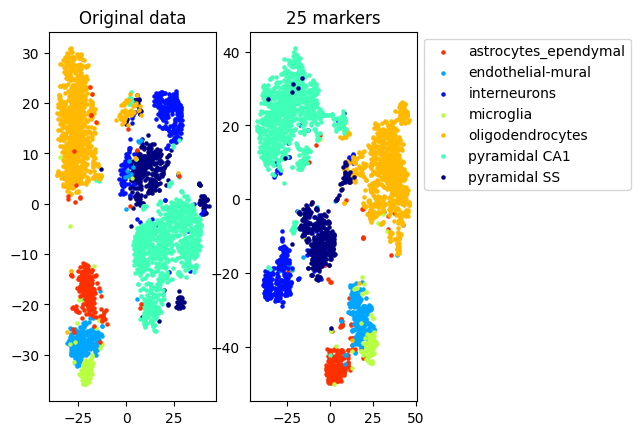

In [17]:
#TSNE plot
a=plot_marker_selection(data, markers, names[0])

## Example from second level of the hierarchy

Computing TSNE embedding
Elapsed time: 2.1635630130767822 seconds
Computing TSNE embedding
Elapsed time: 1.4651751518249512 seconds
Computing TSNE embedding
Elapsed time: 1.1531219482421875 seconds
Computing TSNE embedding
Elapsed time: 4.807234048843384 seconds
Computing TSNE embedding
Elapsed time: 0.5163900852203369 seconds
Computing TSNE embedding
Elapsed time: 4.786436080932617 seconds
Computing TSNE embedding
Elapsed time: 1.148216962814331 seconds


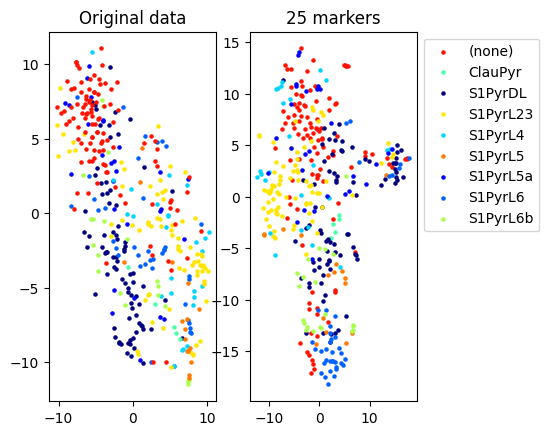

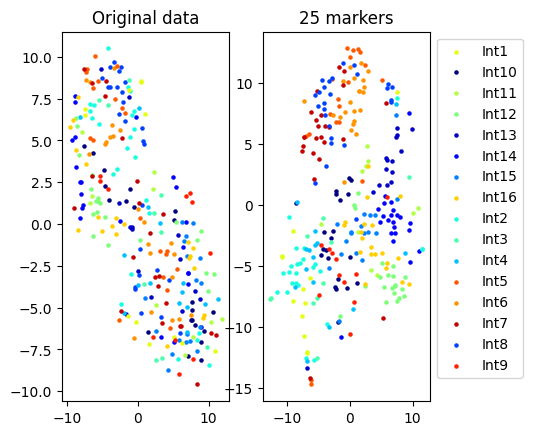

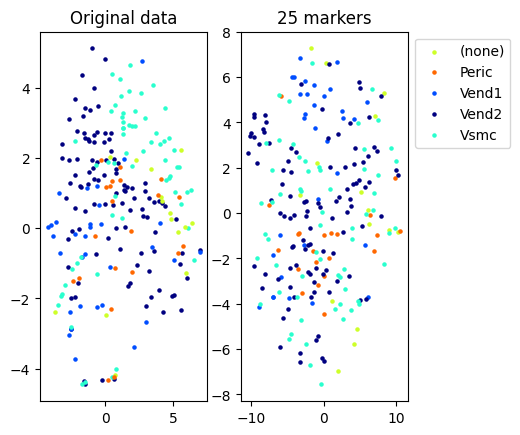

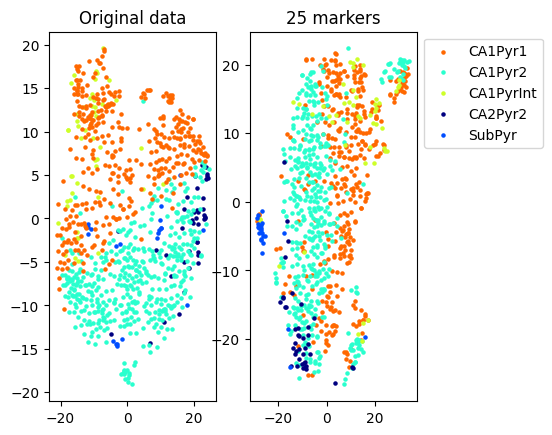

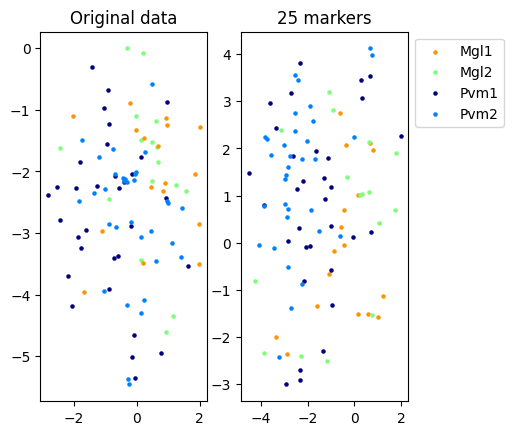

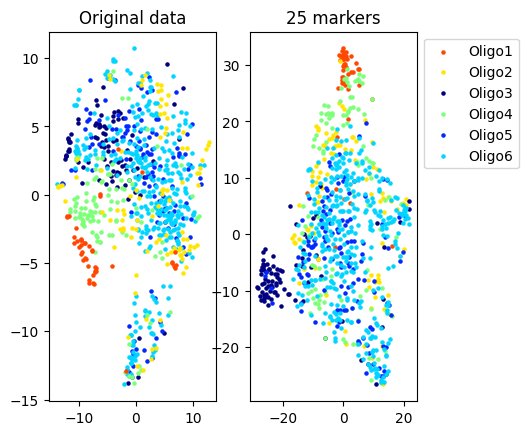

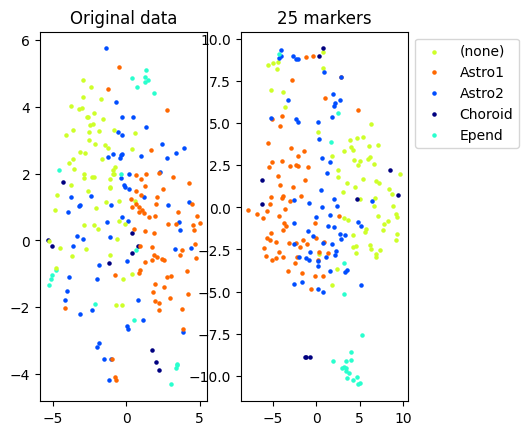

In [18]:
for name in set(names[0]):
    idx=[s for s in range(len(names[0])) if names[0][s]==name]
    aux=plot_marker_selection(data[idx], markers, [names[1][s] for s in idx])

## One vs all markers

In [19]:
markers2=one_vs_all_selection(data,labels[0])

accuracy=performance(data, labels[0], data, labels[0], clf)
accuracy_markers=performance(data[:,markers2], labels[0], data[:,markers2], labels[0], clf)

print("Accuracy (whole data,", d, " markers): ", accuracy)
print("Accuracy (selected", num_markers, "markers)", accuracy_markers)

8.814776088545281 20 0.4407388044272641
[0.         0.4407388  0.88147761 1.32221641 1.76295522 2.20369402
 2.64443283 3.08517163 3.52591044 3.96664924 4.40738804 4.84812685
 5.28886565 5.72960446 6.17034326 6.61108207 7.05182087 7.49255968
 7.93329848 8.37403728 8.81477609]
Accuracy (whole data, 4000  markers):  0.8745424292845257
Accuracy (selected 25 markers) 0.8569051580698835


Computing TSNE embedding
Elapsed time: 18.490498781204224 seconds


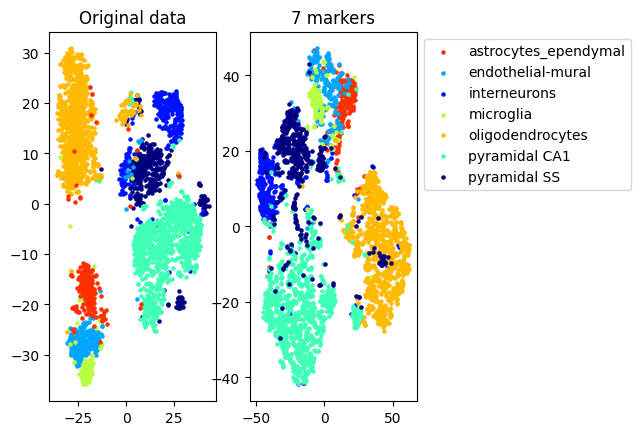

In [20]:
a=plot_marker_selection(data, markers2, names[0])